In [116]:
#library & package. 
#Jalankan ulang jika menambahkan library baru

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
from nltk.corpus import stopwords

In [52]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

auth = tweepy.OAuthHandler(
        api_key,
        api_key_secret,
        access_token,
        access_token_secret
)

auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
api_2= tweepy.Client(bearer_token=bearer_token,wait_on_rate_limit=True)

In [ ]:
#Apa kata kunci yang ingin kalian cari di twitter dan kenapa. 
#jelaskan singkat pada sel ini
'''BINOMO

karena belakangan ini sedang viral kasus tentang judi berkedok binary-option atau trading yang memakan korban hingga milyaran rupiah, dalam kasus tersebut banyak 'influencer kaya' yang menjadi image binomo yang menjanjikan agar cepat kaya raya
salah satunya indra kenz yang merupakah salah satu influencer binomo yang sudah diproses secara hukum
melalui pencarian tweet ini saya ingin melihat respon masyarakat terhadap kasus ini apakah positif atau negatif
'''


In [69]:
#ambil data pada twitter dengan kata kunci tersebut.
#ambil sebanyak 300 tweet
#masukkan pada datarame dan tampilkan dataframenya


In [136]:
 import tweepy

client = tweepy.Client(bearer_token=bearer_token)

# Replace with your own search query
query = 'binomo -is:retweet'
df1= []
# Replace the limit=80 with the maximum number of Tweets you want
for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=300):
    df1.append(tweet.text)
    print(tweet.id)

1498564135113871361
1498563903038849024
1498562274340253696
1498561474653921280
1498560640667222016
1498560394826489858
1498558188974710785
1498557845125865474
1498557781536014336
1498557356371689477
1498556065998585858
1498553953864544256
1498552789433470977
1498552288209940480
1498552098216189959
1498551479803658241
1498551392373407747
1498549689922502656
1498549582074359809
1498549498494144513
1498547234333675521
1498547079534178304
1498546176219824137
1498545809893519362
1498545052997472256
1498545027555151872
1498542100429762563
1498541767326826502
1498541605560946688
1498538342694064128
1498538132215455744
1498537169685999617
1498535438633476099
1498534541694484481
1498534486560342018
1498534155755274241
1498534004345434112
1498533220685549569
1498533129359093764
1498532913180479489
1498532747836813312
1498532202446872577
1498531284343484417
1498530661644345351
1498527851577950213
1498523820868911105
1498523799637348355
1498522177699827715
1498520553292201984
1498520438711877637


In [ ]:
#df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [137]:
#Lakukan Text Preprocessing (lakukan sebaik mungkin). Masukkan pada dataframe kalian dengan nama kolom tweet_clean.
#jangan lupa lakukan pembersihan slang word/bahasa gaul
#Tampilkan dataframe
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) # Menghapus @mentions
    text = re.sub('#', '', text) # Menghapus '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Menghapus RT
    text = re.sub('https?:\/\/\S+', '', text) # Menghapus hyperlink
    return text

In [138]:
len(df1)
df = pd.DataFrame (df1, columns = ['tweets'])

In [139]:
len(df)

300

In [140]:
df.head()

,tweets
0,Kominfo Fasilitasi BAPPEBTI Putus Akses Binomo...
1,@Kita_AMLTF kasus IK tersebut ada kaitannya dg...
2,Bareskrim Polri Lacak Aset Indra Kenz Terkait ...
3,Ada afiliator lain yang akan dipanggil Bareskr...
4,"Kasus Binomo, Polri Lacak Aset Indra Kenz hing..."


In [141]:
df['tweets'] = df['tweets'].apply(cleanTxt)

In [142]:
df['tweets']= df['tweets'].str.lower() #lower
df['tweets']= df['tweets'].str.strip() #whitespace
df['tweets']= df['tweets'].str.replace('\d+', '') #remove number
df['tweets']= df['tweets'].str.replace(r'[^\w\s]+', '')

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_17412/1781403474.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweets']= df['tweets'].str.replace('\d+', '') #remove number
C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_17412/1781403474.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweets']= df['tweets'].str.replace(r'[^\w\s]+', '')


In [143]:
stop = stopwords.words('indonesian')
test = pd.DataFrame(df)
test['tweets'] = test['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)

                                                tweets
0    kominfo fasilitasi bappebti putus akses binomo...
1    _amltf ik kaitannya dg tppu ik diduga dg senga...
2    bareskrim polri lacak aset indra kenz terkait ...
3    afiliator dipanggil bareskrim indra kenz kumpa...
4           binomo polri lacak aset indra kenz kerabat
..                                                 ...
295  _ trading nya ya binomo dah loh investasi bodo...
296  dah wanti wanti nih orang pas liat yutupnya bl...
297  disita asetnyasambil menunggu keputusan pengad...
298                                      binomo master
299                                  affiliator binomo

[300 rows x 1 columns]


In [144]:
df

,tweets
0,kominfo fasilitasi bappebti putus akses binomo...
1,_amltf ik kaitannya dg tppu ik diduga dg senga...
2,bareskrim polri lacak aset indra kenz terkait ...
3,afiliator dipanggil bareskrim indra kenz kumpa...
4,binomo polri lacak aset indra kenz kerabat
...,...
295,_ trading nya ya binomo dah loh investasi bodo...
296,dah wanti wanti nih orang pas liat yutupnya bl...
297,disita asetnyasambil menunggu keputusan pengad...
298,binomo master


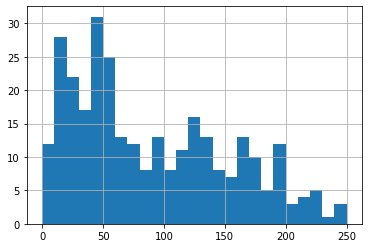

In [145]:
#lakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#tampilkan plot dari setiap analysis
#dengan melihat word_frequency coba perbaiki pembersihan slang word pada tweet_clean
#tampilkan dataframe kalian


#Distribusi Frekuensi Jumlah Karakter per Data
bin_range = np.arange(0, 260, 10)
df['tweets'].str.len().hist(bins=bin_range)
plt.show()


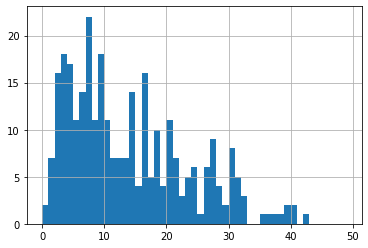

In [146]:
#Distribusi Frekuensi Jumlah Kata per Data
bin_range = np.arange(0, 50)
df['tweets'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

C:\Users\LENOVO X260\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\LENOVO X260\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


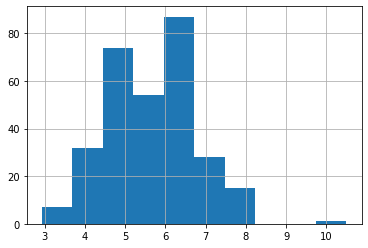

In [147]:
#Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data
df['tweets'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

<FreqDist with 1644 samples and 4042 outcomes>
[('binomo', 323), ('yg', 85), ('indra', 74), ('kenz', 64), ('trading', 50), ('ga', 37), ('binary', 33), ('ya', 33), ('orang', 30), ('option', 29), ('investasi', 28), ('nya', 26), ('kalo', 25), ('main', 25), ('aja', 24), ('gak', 23), ('udah', 22), ('zentrader', 22), ('influencer', 21), ('aset', 20)]


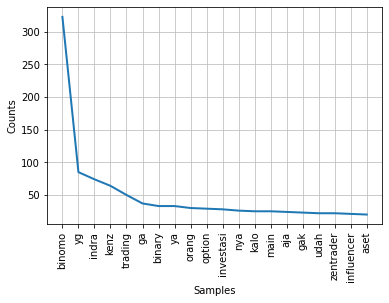

In [148]:
#Distribusi Frekuensi Kata
df['tweets'] = df['tweets'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweets in df['tweets'] for word in tweets]
fqdist = FreqDist(tweets)
print(fqdist)
most_common_word = fqdist.most_common(20)
print(most_common_word)

fqdist.plot(20,cumulative=False)

plt.show()



In [149]:
#Lakukan Sentiment Analysis 
#masukkan hasilnya pada dataframe dengan nama kolom "sentiment"
pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines() 


In [151]:
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']
for item in df1:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if df1[df1.index(item)-1] in list_anti:
                    print(df1[df1.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if df1[df1.index(item)-1] in list_anti:
                    print(df1[df1.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))

Kominfo Fasilitasi BAPPEBTI Putus Akses Binomo dkk
@kemkominfo @PlateJohnny https://t.co/AN3Dd5kl1y
positif: 0
negatif: 0
@Kita_AMLTF kasus IK tersebut ada kaitannya dg TPPU karena IK diduga telah dg sengaja menjalankan investasi bodong melalui sebuah aplikasi trading binary option bernama Binomo yang ternyata tidak terdaftar di Badan Pengawas Perdagangan Berjangka Komoditi (Bappebti) Kementerian Perdagangan
kasus
 ['negatif']
diduga
 ['negatif']
positif: 0
negatif: 2
Bareskrim Polri Lacak Aset Indra Kenz Terkait Kasus Binomo
https://t.co/uZtsATiuD4
kasus
 ['negatif']
positif: 0
negatif: 1
Ada afiliator lain yang akan dipanggil Bareskrim, selain Indra Kenz. #kumparanNEWS https://t.co/dU5fo5pff4
positif: 0
negatif: 0
Kasus Binomo, Polri Lacak Aset Indra Kenz hingga ke Kerabat https://t.co/bvVt3FHEze
kasus
 ['negatif']
positif: 0
negatif: 1
@OctaBerjangka Bandar binomo pindah ke octa 🤣🤣🤣
positif: 0
negatif: 0
@YoSoyCandel Binomo B)
positif: 0
negatif: 0
Rahasia masa depanmu terlihat pada

In [152]:
hasil = []
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

for item in df1:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if df1[df1.index(item)-1] in list_anti:
                    print(df1[df1.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if df1[df1.index(item)-1] in list_anti:
                    print(df1[df1.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    hasil.append(count_p - count_n)
    # print ("-----------------------------------------------------")
    
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))

Kominfo Fasilitasi BAPPEBTI Putus Akses Binomo dkk
@kemkominfo @PlateJohnny https://t.co/AN3Dd5kl1y
positif: 0
negatif: 0
@Kita_AMLTF kasus IK tersebut ada kaitannya dg TPPU karena IK diduga telah dg sengaja menjalankan investasi bodong melalui sebuah aplikasi trading binary option bernama Binomo yang ternyata tidak terdaftar di Badan Pengawas Perdagangan Berjangka Komoditi (Bappebti) Kementerian Perdagangan
kasus
 ['negatif']
diduga
 ['negatif']
positif: 0
negatif: 2
Bareskrim Polri Lacak Aset Indra Kenz Terkait Kasus Binomo
https://t.co/uZtsATiuD4
kasus
 ['negatif']
positif: 0
negatif: 1
Ada afiliator lain yang akan dipanggil Bareskrim, selain Indra Kenz. #kumparanNEWS https://t.co/dU5fo5pff4
positif: 0
negatif: 0
Kasus Binomo, Polri Lacak Aset Indra Kenz hingga ke Kerabat https://t.co/bvVt3FHEze
kasus
 ['negatif']
positif: 0
negatif: 1
@OctaBerjangka Bandar binomo pindah ke octa 🤣🤣🤣
positif: 0
negatif: 0
@YoSoyCandel Binomo B)
positif: 0
negatif: 0
Rahasia masa depanmu terlihat pada

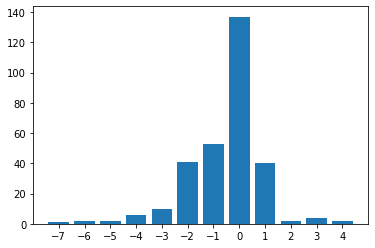

In [153]:
labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [ ]:
#lakukan analisis dan tarik kesimpulan dari Text analysis dan Sentiment Analysis
#masukkan analisis kalian pada sel berikut.

Nilai rata-rata: -0.5133333333333333
Standar deviasi: 1.4270560216364627

berdasarkan data diatas tweet dari pengguna twitter tentang 'binomo' masih bersifat negatif, dengan nilai rata-rata -0.5, ini membuktikan bahwa banyak masyarakat yang merespon negatif terhadap kata kunci binomo
